In [105]:
!pip install nltk

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/007yemmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Reading the Data
df=pd.read_csv("/Users/007yemmar/Downloads/blogtext.csv")
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [3]:
df.shape

(681284, 7)

In [4]:
#Dropping the "id" axis as it does not impact our decisions
df.drop('id',axis=1,inplace=True)
df.drop('sign',axis=1,inplace=True)
df.drop('topic',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)

In [5]:
df.head()

,gender,age,text
0,male,15,"Info has been found (+/- 100 pages,..."
1,male,15,These are the team members: Drewe...
2,male,15,In het kader van kernfusie op aarde...
3,male,15,testing!!! testing!!!
4,male,33,Thanks to Yahoo!'s Toolbar I can ...


In [6]:
max(df['age'])

48

In [7]:
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50]
values = [0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
df['age'] = pd.qcut(df['age'], 8, labels = values)

In [9]:
df.head()

,gender,age,text
0,male,0,"Info has been found (+/- 100 pages,..."
1,male,0,These are the team members: Drewe...
2,male,0,In het kader van kernfusie op aarde...
3,male,0,testing!!! testing!!!
4,male,6,Thanks to Yahoo!'s Toolbar I can ...


In [10]:
le = preprocessing.LabelEncoder()

df["gender"] = le.fit_transform(df["gender"])

df.head()

,gender,age,text
0,1,0,"Info has been found (+/- 100 pages,..."
1,1,0,These are the team members: Drewe...
2,1,0,In het kader van kernfusie op aarde...
3,1,0,testing!!! testing!!!
4,1,6,Thanks to Yahoo!'s Toolbar I can ...


In [11]:
gender = ['male', 'female']

#1: male, 2:female

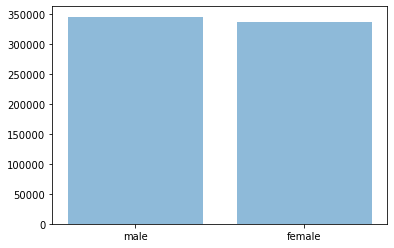

In [12]:
plt.bar(gender, df.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [13]:
ages = [0, 1, 2, 3, 4, 5, 6, 7]

In [14]:
df.age

0         0
1         0
2         0
3         0
4         6
         ..
681279    2
681280    2
681281    2
681282    2
681283    2
Name: age, Length: 681284, dtype: category
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

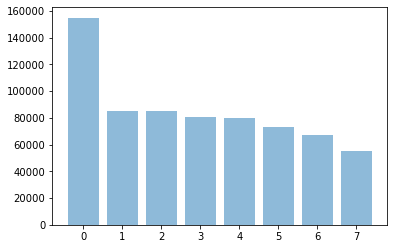

In [15]:
plt.bar(ages, df.age.value_counts(), align='center', alpha=0.5)
plt.show()

In [17]:
df_train, df_test = train_test_split(df, test_size=0.015, stratify=df[["gender", "age"]])

In [18]:
df_test.shape

(10220, 3)

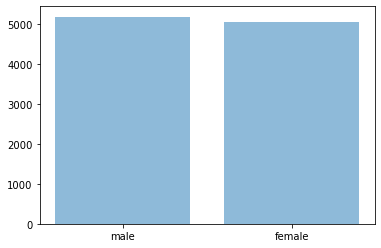

In [19]:
plt.bar(gender, df_test.gender.value_counts(), align='center', alpha=0.5)
plt.show()

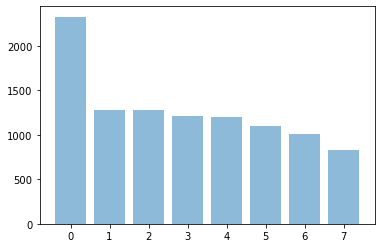

In [20]:
plt.bar(ages, df_test.age.value_counts(), align='center', alpha=0.5)
plt.show()

In [21]:
df_test.to_csv('Blogpost-Shrunk.csv', index=False)

In [22]:
df = df_test
df = df.reset_index(drop=True)
text=df['text']

In [23]:
text.head()

0                  urlLink How kinky in bed are you...
1               Ha.   Oh well.  Good luck on your t...
2            .Scene  Today I'm going to something I...
3                     If per chance you wander on t...
4                   I am not a happy bunny.  I'm no...
Name: text, dtype: object

In [24]:
text.shape

(10220,)

In [25]:
stop=set(stopwords.words('english'))
print(stop)

{'ll', 'such', "wouldn't", 'in', 'which', 'about', 'then', 'most', 'does', "it's", 'until', 'only', 'before', 'shan', 'of', 'here', 'ma', 'that', "wasn't", 'on', 'ain', 'out', 's', 'when', 'who', 'y', "you've", 'i', 'but', 'nor', 'through', 'been', 'or', 'do', 'some', 'there', "hasn't", "won't", 'itself', 'each', 'mightn', 'and', 'has', "you'd", 'her', 'ourselves', 'its', 'few', 'was', 'just', "you'll", 'aren', 'the', 'you', 'if', "doesn't", 'too', 'into', 'at', 'won', 'myself', 'it', 'between', 'were', 'for', 'your', 'a', 'mustn', "shan't", 'same', 'herself', 'theirs', 'had', 'from', 'am', 'during', "mustn't", 'my', 'him', 'weren', 'again', 'needn', 'be', "weren't", 'up', 'he', 'what', 'no', 'now', 'other', "should've", 'ours', 'yourself', 've', 'an', 'once', 'can', 'they', 'so', 'down', "didn't", 'them', 'is', "hadn't", 'doesn', "she's", 'wouldn', 'their', 'should', 'she', 'hadn', "don't", 'yours', 'those', "mightn't", 't', 'very', "needn't", 'hers', 'hasn', 'to', 'didn', 'doing', 'b

In [27]:
len(text.values)

10220

In [28]:
import re
print("start")
temp=[]
snow=nltk.stem.SnowballStemmer('english')

i = 0
for sentence in text.values:
    if i % 1000 == 0:
        print(i)
    i += 1
    sentence = sentence.lower()    # converting to lowercase
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)   # removing HTML tags
    sentence=re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/|&|-|~|:|;]',r'',sentence)  # removing punctuations
    
    words=[snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]
    temp.append(words)

start
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [29]:
final_text=temp.copy()
print(text.shape)
print(len(final_text))

(10220,)
10220


In [30]:
print(final_text[0])

['urllink', 'kinki', 'bed', 'part', 'ii']


In [31]:
sent=[]
for row in final_text:
    seq=''
    for word in row:
        seq=seq+' '+word
    sent.append(seq)

In [32]:
cv=CountVectorizer(max_features=5000)

In [33]:
data = cv.fit_transform(sent)

In [34]:
len(cv.vocabulary_)

5000

In [35]:
data.toarray().shape

(10220, 5000)

In [36]:
sent[0]

' urllink kinki bed part ii'

In [37]:
sent[100]

" never thought would learn set feed tub “tpn” don't even know stand yet nurs great two tutori seem barley enough tri hold faith faith surviv faith job pray wont crumbl pressur life brought forth much pain much suffer faith sustain fill father love break forth light deep"

In [38]:
proc_sent = pd.DataFrame(sent)

In [39]:
proc_sent.shape

(10220, 1)

In [40]:
df.drop('text',axis=1,inplace=True)

In [41]:
df['text'] = sent

In [42]:
df.head()

,gender,age,text
0,1,3,urllink kinki bed part ii
1,1,2,ha oh well good luck trippin tri buy weird st...
2,1,0,scene today im go someth im go regret im go p...
3,0,3,per chanc wander site dont know let introduc ...
4,0,4,happi bunni im sleep well moment various reas...


In [43]:
df.to_csv('Blogpost-Processed.csv', index=False)